In [1]:
library(SingleCellExperiment)
library(SC3)
library(scater)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

In [26]:
source("/scDAC-main/scDAC/preprocess/utils.R")

base_dir1 <- "./data/b1"
base_dir <- "./data/processed/baron_single/subset_0/mat/rna.csv"
base_dir_label <- "./data/b1/l1.csv"
base_dir_feat <- "./data/processed/baron_single/feat/feat_names_rna.csv"
# mkdir(output_dir, remove_old = F)

In [27]:
expression_matrix <- t(read.csv(base_dir, header = T, stringsAsFactors = F, row.names = 1))

In [28]:
counts = as.matrix(expression_matrix)


In [29]:
dim(counts)

[1]  4000 44808

In [30]:
label <- read.csv(base_dir_label, header = T, row.names = 1)

In [31]:
dim(label)

[1] 44808     1

In [32]:
feat = read.csv(base_dir_feat, header = T, row.names = 1)

In [33]:
dim(feat)

[1] 4000    1

In [34]:
sce <- SingleCellExperiment(
    assays = list(
        counts = counts,
        logcounts = log2(counts + 1)
    ), 
    colData = label
)

In [35]:
rowData(sce)$feature_symbol = feat

In [36]:
sce <- runPCA(sce)

In [16]:
dim(sce)

[1]  4000 65539

In [ ]:
str(sce)

In [37]:
sce <- sc3(sce, ks = 3:30, biology = TRUE)

Setting SC3 parameters...

Your dataset contains more than 2000 cells. Adjusting the nstart parameter of kmeans to 50 for faster performance...

Defining training cells for SVM using 5000 random cells...

Calculating distances between the cells...

Performing transformations and calculating eigenvectors...

Performing k-means clustering...



Calculating consensus matrix...

Calculating biology...



In [ ]:
sce<-sc3_estimate_k(sce) 

In [ ]:
ks<-metadata(sce)$sc3$k_estimation #调用k值


In [ ]:
metadata(sce)$sc3$silhouette

Warning message:
"Removed 3569 rows containing missing values (`geom_point()`)."


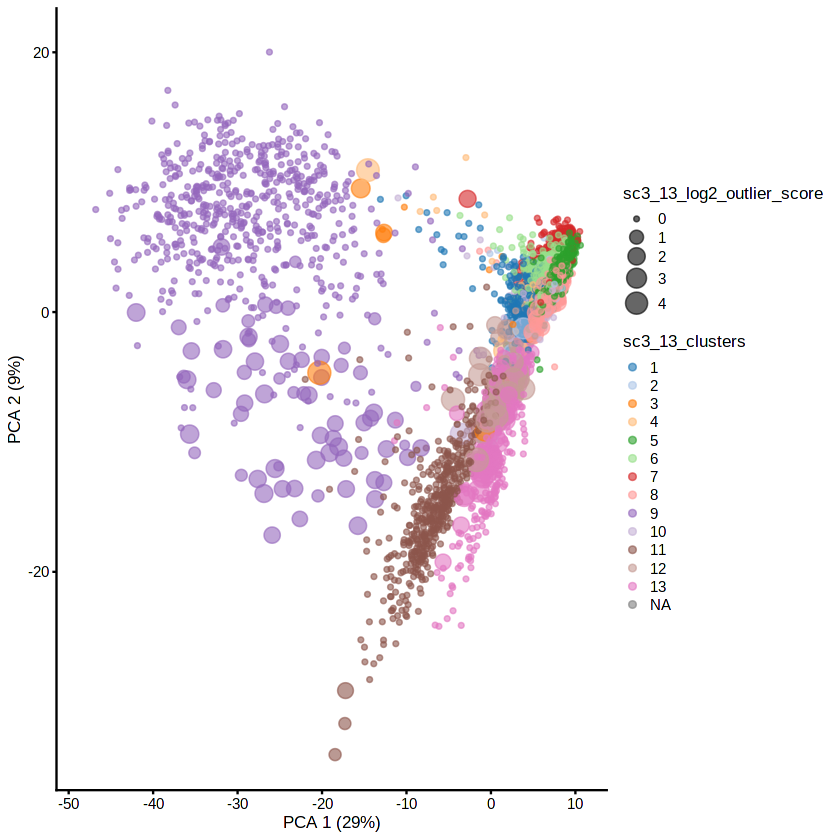

In [34]:
plotPCA(
  sce,
  colour_by = "sc3_clusters",
  size_by = "sc3_log2_outlier_score"
)

In [ ]:
labels <-sce@colData$sc3_clusters



In [45]:
output_dir <- pj(base_dir1, "sce")

In [48]:
write.csv(labels, file = pj(output_dir, "predict.csv"))